# Convolutional Layer

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import random

import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

## Load Dataset

In [40]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [41]:
print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of Y_train = {Y_train.shape}")
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of Y_test = {Y_test.shape}")

Shape of X_train = (60000, 28, 28)
Shape of Y_train = (60000,)
Shape of X_test = (10000, 28, 28)
Shape of Y_test = (10000,)


In [42]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [43]:
Y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## Normalize

In [44]:
print(f"Maximum Value in X_train = {np.max(X_train)}")
print(f"Minimum Value in X_train = {np.min(X_train)}")
X_train = X_train/255.0
print(f"Maximum Value after rescale = {np.max(X_train)}")
print(f"Minimum Value after rescale = {np.min(X_train)}")

Maximum Value in X_train = 255
Minimum Value in X_train = 0
Maximum Value after rescale = 1.0
Minimum Value after rescale = 0.0


In [45]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Visualize

9


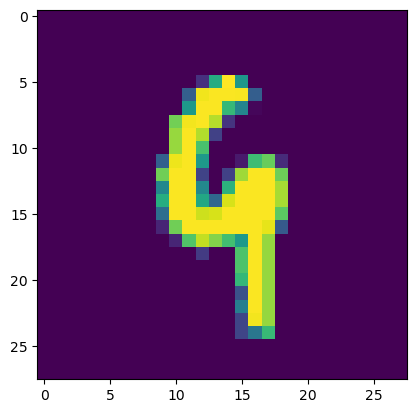

In [54]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
print(Y_train[idx])

# Model Building

In [71]:
model = Sequential([
    Conv2D(32, (4, 4), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    
    Conv2D(32, (4, 4), activation="relu"),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

In [72]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 12, 12, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 9, 9, 32)          16416     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 4, 4, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 64)               

## Loss and Optimizer

In [73]:
model.compile(
    loss = SparseCategoricalCrossentropy(),
    optimizer = Adam(),
    metrics = ["accuracy"]
)

## Model Training

In [74]:
model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 64s 33ms/step - loss: 0.1602 - accuracy: 0.9512
Epoch 2/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0524 - accuracy: 0.9839
Epoch 3/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0382 - accuracy: 0.9883
Epoch 4/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0296 - accuracy: 0.9904
Epoch 5/5
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0221 - accuracy: 0.9926


## Performance on Test Dataset

In [75]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 4s 13ms/step - loss: 17.5930 - accuracy: 0.9731


[17.593036651611328, 0.9731000065803528]